# Análise dos Dados do Cadastro Único

O ojetivo desse trabalho é fazer a análise completa de uma base de dados reais. Vocês devem aplicar os conceitos de análise, transformação e visualização de dados para analisar, entender e trazer informações da base proposta.

## Sobre a base 

A base disponibilizada consiste em dados do Cadastro Único do governo federal. Segundo o manual do pesquisador, o _"Cadastro Único para Programas Sociais do Governo Federal – ou simplesmente Cadastro Único, como é mais conhecido – é um instrumento que possibilita a identificação e a caracterização socioeconômica das famílias brasileiras de baixa renda"._ Mais informações sobre o cadastro único podem ser encontradas no [manual do pesquisador](https://aplicacoes.mds.gov.br/sagirmps/ferramentas/docs/manual_do_pesquisador_cadastro_unico_semlogo.pdf). 

Os microdados especificados nesta base possui uma informação importante que é a marcação do bolsa família. Essa marcação indica se uma família é beneficiária ou não do programa bolsa família. Segundo o manual do pesquisador, _"o Programa Bolsa Família (PBF) é um programa de transferência direta de renda com condicionalidades, que visa melhorar a vida das famílias em situação de pobreza e extrema pobreza do Brasil. O Programa foi criado pelo Governo Federal, em 2003, por meio da Medida Provisória nº 132, que posteriormente foi convertida na Lei n° 10.836, de 9 de janeiro de 2004"_. Mais informações sobre o bolsa família podem ser encontradas no [manual do pesquisador](https://aplicacoes.mds.gov.br/sagirmps/ferramentas/docs/manual_do_pesquisador_gestao_bolsa_familia_semlogo.pdf). 

Os dados são compostos por dois arquivos: a base família e a base pessoas. As bases são desidentificadas, ou seja, não possuem informações que permitam identificar quem são as pessoas. Cada base é composta por uma série de identificadores sócio-econômico das pessoas e famílias. Existe um identificador que permite associar família e pessoas. 

A base completa pode ser encontrada neste repositório na pasta `dataset/`. A base possui 3 arquivos:

* **data_familia_sergipe.csv**: dados das famílias.
* **data_pessoas_sergipe.csv**: dadaos das pessoas.
* **Dicionario_base_desidentificada_pt.xlsx**: dicionário de dados explicando o que é cada uma dos campos das bases. 

Os dados foram coletados até o final de 2018. 

In [1]:
# imports necessários

import pandas as pd

Os dados podem ser lidos a partir do código a seguir: 

In [2]:
# leitura dos dados das famílias

data_familia = pd.read_csv("./dataset/data_familia_sergipe.csv")
data_familia.head()

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,2806206,2,3,183415.0,2006-01-07,2018-09-30,58.0,2018-02-27,1.0,1.0,...,2.0,2.0,P S IVA SALGUEIRO,2421836.0,CRAS CENTRO DE REFERENCIA DA ASSISTENCIA SOCIAL,2.806200e+10,0.0,0,4,550052838636015
1,2803609,2,3,183416.0,2010-03-09,2018-09-30,190.0,2018-07-20,2.0,1.0,...,2.0,2.0,POSTO DE SAUDE RICARDO HAGENBECK,2421380.0,CRAS ANGELA MARIA DE CARVALHO LIMA BOMFIM,2.803602e+10,0.0,0,5,550245146328323
2,2803203,2,3,183417.0,2006-02-25,2018-09-30,100.0,2018-08-21,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550305936601879
3,2805703,2,3,183418.0,2004-05-25,2017-12-15,937.0,2017-11-09,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0,1,550405659971983
4,2805307,1,3,183419.0,2016-03-31,2018-10-15,25.0,2018-10-15,2.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550245146328323


In [3]:
nomecidade = pd.read_excel("dataset\RELATORIO_DTB_BRASIL_MUNICIPIO.xls")

In [4]:
print("Total de linhas: %i \nTotal de instâncias: %i" % (data_familia.shape[0], data_familia.shape[1]))

Total de linhas: 82275 
Total de instâncias: 31


In [5]:
# leitura dos dados das pessoas

data_pessoas = pd.read_csv("./dataset/data_pessoas_sergipe.csv")
data_pessoas.head()

,cd_ibge,estrato,classf,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,...,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,val_renda_bruta_12_meses_memb,val_renda_doacao_memb,val_renda_aposent_memb,val_renda_seguro_desemp_memb,val_renda_pensao_alimen_memb,val_outras_rendas_memb,peso.fam,peso.pes
0,2805208,1,3,206870.0,24.0,1,19,1,4.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,100.0,550245146328323,563273265962979
1,2805505,2,3,1936145.0,35.0,1,17,3,4.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,550245146328323,563340413648347
2,2800308,2,1,4239973.0,103.0,1,4,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,550245146328323,56328235405831
3,2805604,2,3,2022175.0,324.0,2,4,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,100.0,NaN,550390600873778,563301639311753
4,2801306,2,3,2300485.0,328.0,1,7,3,2.0,2.0,...,NaN,NaN,NaN,NaN,0.0,NaN,100.0,NaN,550361832442675,563323831491962


In [6]:
print("Total de linhas: %i \nTotal de instâncias: %i" % (data_pessoas.shape[0], data_pessoas.shape[1]))

Total de linhas: 205614 
Total de instâncias: 35


## Atividade

A atividade consiste em fazer uma análise dos dados disponibilizados com o objetivo de entende-los e encontrar informações relevantes, de acordo com as regras do cadastro único e do bolsa família, que ajudem a responder as perguntas elaboradas para a atividade. Caso seja necessário, deve-se fazer a transformação dos dados com a finalidade de melhor organizar as informações disponibilizadas. Por fim, deve-se criar algumas visualizações para dar suporte na análise completa dos dados.

A análise deve procurar responder as seguintes perguntas: 

* **Qual o perfil das famílias e pessoas que recebem bolsa família em Sergipe?**
* **O perfil mapeado está de acordo com os critérios estabelicidos pera o Bolsa Família?**





In [7]:
# Comece a sua análise a partir deste ponto.

In [8]:
# primeiro vamos contabilizar o numero de familias por municipio, de acordo com seus codigos do IBGE

In [9]:
import numpy as np
import matplotlib

In [10]:
# primeiro isolamos somente as familias que recebem bolsa familia no grupo
df1=rslt_df = data_familia[data_familia['marc_pbf'] == 1] 

In [11]:
nomecidade

,UF,Nome_UF,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Código Município Completo,Nome_Município
0,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,15,1100015,Alta Floresta D'Oeste
1,11,Rondônia,1102,Ji-Paraná,110005,Cacoal,2,Leste Rondoniense,6,Cacoal,379,1100379,Alto Alegre dos Parecis
2,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,403,1100403,Alto Paraíso
3,11,Rondônia,1102,Ji-Paraná,110004,Ji-Paraná,2,Leste Rondoniense,5,Alvorada D'Oeste,346,1100346,Alvorada D'Oeste
4,11,Rondônia,1101,Porto Velho,110002,Ariquemes,2,Leste Rondoniense,3,Ariquemes,23,1100023,Ariquemes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,52,Goiás,5201,Goiânia,520002,Anápolis,5,Sul Goiano,16,Pires do Rio,22005,5222005,Vianópolis
5566,52,Goiás,5202,Itumbiara,520009,Piracanjuba,5,Sul Goiano,15,Meia Ponte,22054,5222054,Vicentinópolis
5567,52,Goiás,5206,Luziânia - Águas Lindas de Goiás,520022,Flores de Goiás,4,Leste Goiano,12,Entorno de Brasília,22203,5222203,Vila Boa
5568,52,Goiás,5205,Porangatu - Uruaçu,520018,Ceres - Rialma - Goianésia,4,Leste Goiano,12,Entorno de Brasília,22302,5222302,Vila Propício


In [12]:
df3=nomecidade[["Código Município Completo","Nome_Município"]]

In [13]:
df3.rename(columns = {'Código Município Completo':'cd_ibge'}, inplace = True)

C:\Users\andre\AppData\Local\Temp\ipykernel_7676\318954084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns = {'Código Município Completo':'cd_ibge'}, inplace = True)


In [14]:
df1=df1.merge(df3,on="cd_ibge")

In [15]:
df2 = df1.groupby(['Nome_Município']).size()

In [16]:
display(df2)

Nome_Município
Amparo do São Francisco      19
Aquidabã                    211
Aracaju                    5877
Arauá                       114
Areia Branca                143
                           ... 
São Miguel do Aleixo         40
Telha                        54
Tobias Barreto             1981
Tomar do Geru               155
Umbaúba                     871
Length: 75, dtype: int64

In [17]:
df3

,cd_ibge,Nome_Município
0,1100015,Alta Floresta D'Oeste
1,1100379,Alto Alegre dos Parecis
2,1100403,Alto Paraíso
3,1100346,Alvorada D'Oeste
4,1100023,Ariquemes
...,...,...
5565,5222005,Vianópolis
5566,5222054,Vicentinópolis
5567,5222203,Vila Boa
5568,5222302,Vila Propício


In [18]:
print(df3)

      cd_ibge           Nome_Município
0     1100015    Alta Floresta D'Oeste
1     1100379  Alto Alegre dos Parecis
2     1100403             Alto Paraíso
3     1100346         Alvorada D'Oeste
4     1100023                Ariquemes
...       ...                      ...
5565  5222005               Vianópolis
5566  5222054           Vicentinópolis
5567  5222203                 Vila Boa
5568  5222302            Vila Propício
5569  5300108                 Brasília

[5570 rows x 2 columns]


<AxesSubplot: title={'center': 'familias que recebem bolsa familia por cidade'}, xlabel='Nome_Município'>

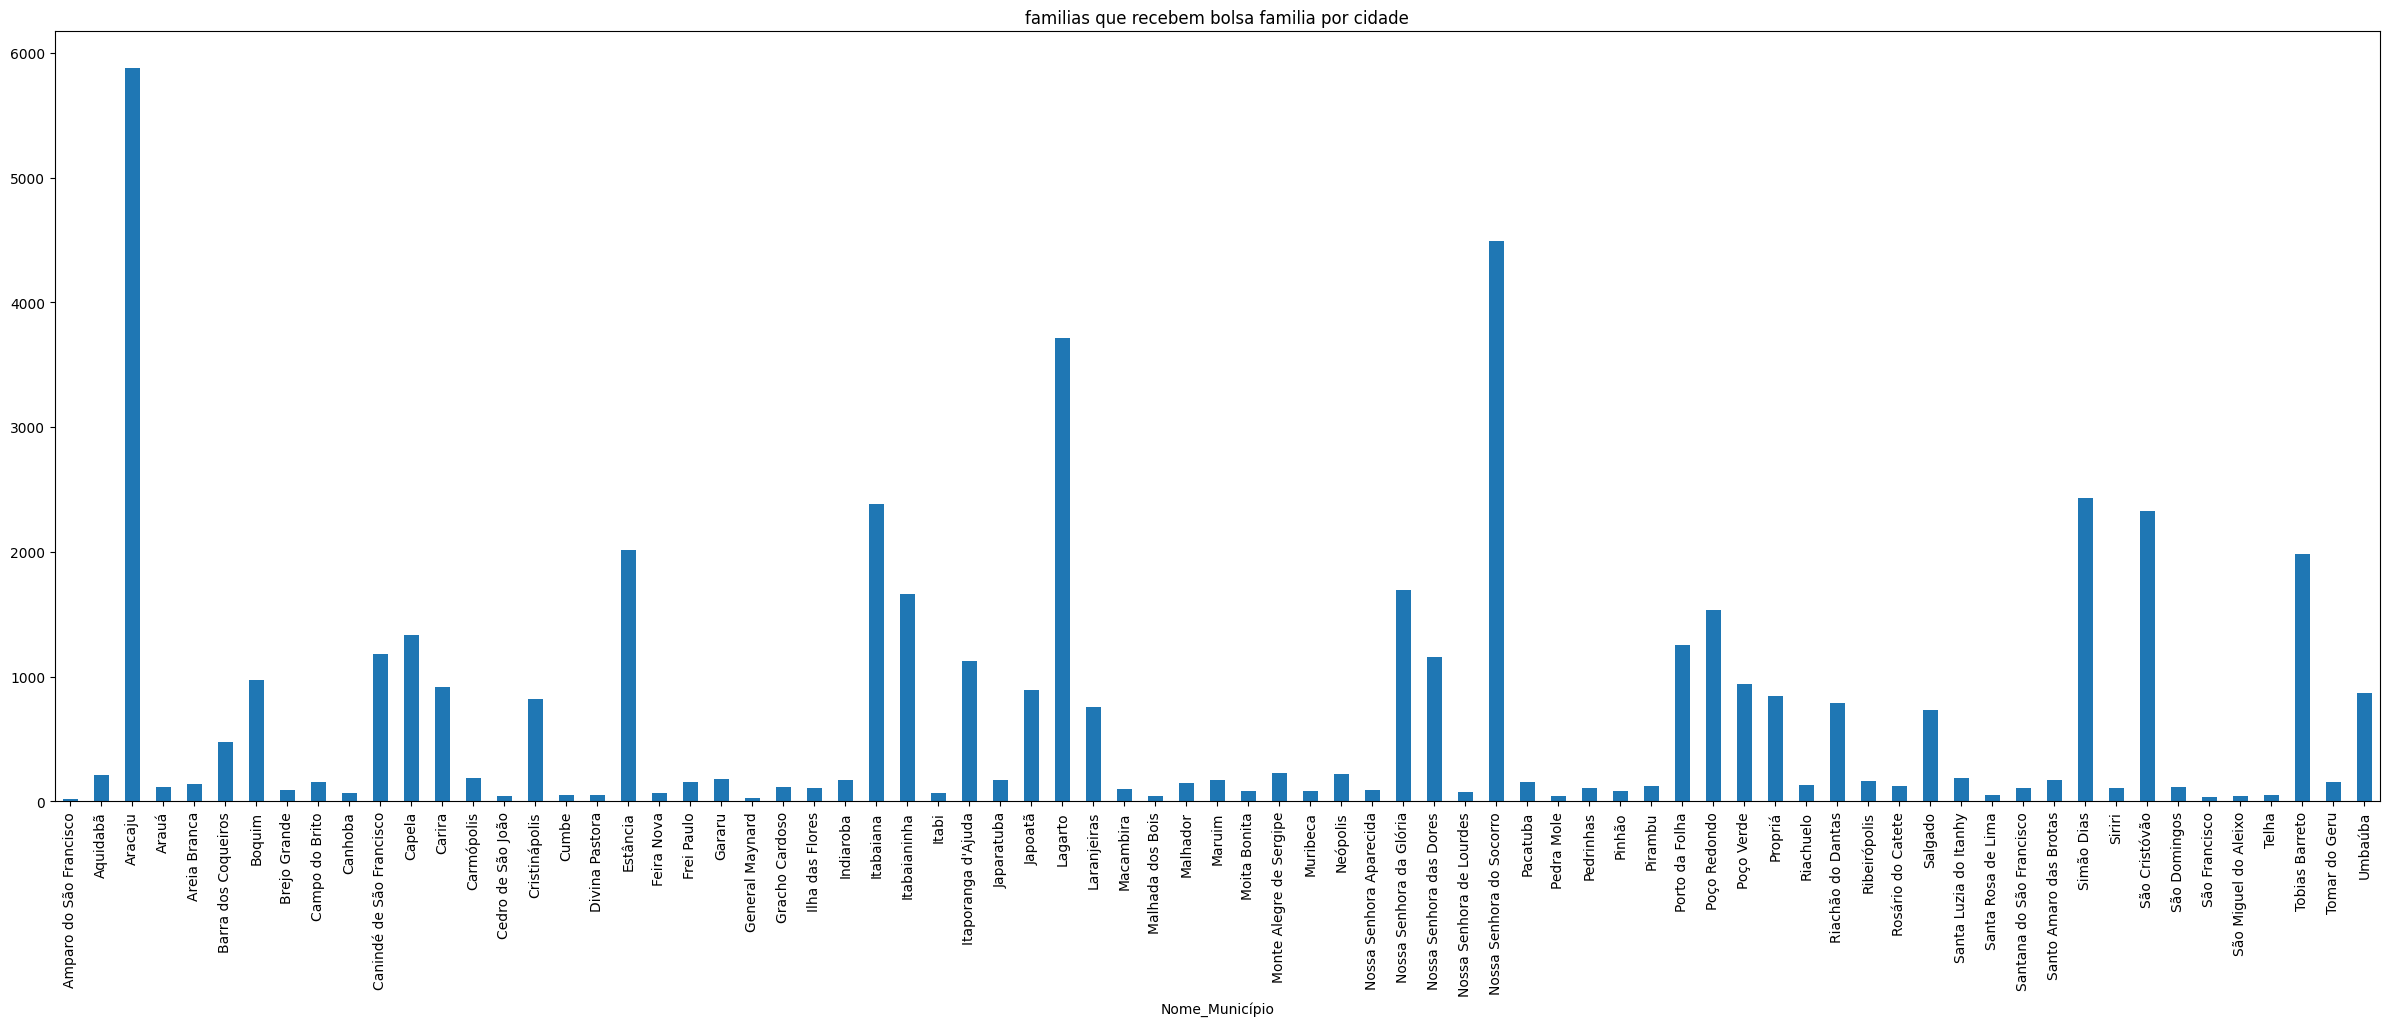

In [19]:
#comparando de maneira grafica
df2.plot(kind="bar",figsize=(30,10),title=("familias que recebem bolsa familia por cidade"))

In [20]:
# Se possivel subististiuir o numero do IBGE pelo atual nome da cidade, 

In [21]:
#agora vamos continuar com o numero das cidades mas dessa vez vamos tambem verificar se eles vivem em zonas ruais ou urbanas

In [22]:
df1

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam,Nome_Município
0,2803203,2,3,183417.0,2006-02-25,2018-09-30,100.0,2018-08-21,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550305936601879,Itaporanga d'Ajuda
1,2803203,2,3,183594.0,2016-06-10,2016-06-13,50.0,2016-06-10,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550305936601879,Itaporanga d'Ajuda
2,2803203,2,3,183702.0,2002-09-03,2018-09-30,156.0,2017-08-04,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,0.0,1,6,550305936601879,Itaporanga d'Ajuda
3,2803203,2,3,183734.0,2018-11-28,2018-12-04,11.0,2018-11-28,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,0.0,1,9,550305936601879,Itaporanga d'Ajuda
4,2803203,2,3,183735.0,2018-04-05,2018-10-04,11.0,2018-10-04,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,0.0,1,3,550305936601879,Itaporanga d'Ajuda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50562,2800308,2,1,4250240.0,2009-10-19,2018-09-30,133.0,2017-08-03,1.0,1.0,...,2.0,US OSVALDO LEITE TERRA DURA,2216.0,CRAS SANTA MARIA,2.800300e+10,0.0,1,3,550245146328323,Aracaju
50563,2800308,2,1,4250241.0,2016-08-29,2018-10-01,75.0,2016-08-29,1.0,1.0,...,2.0,US DONA JOVEM AZEVEDO INDUSTRIAL,2763.0,CRAS PEDRO AVERAN,2.800302e+10,0.0,1,3,550245146328323,Aracaju
50564,2800308,2,1,4250243.0,2018-12-05,2018-12-05,100.0,2018-12-05,1.0,1.0,...,2.0,US JOSE QUINTILIANO DA FONSECA SOBRAL CIDADE NOVA,2771.0,CRAS RISOLETA NEVES,2.800300e+10,0.0,1,3,550245146328323,Aracaju
50565,2800308,2,1,4250244.0,2012-10-15,2018-10-01,8.0,2018-08-13,1.0,1.0,...,2.0,US JOAO BEZERRA AREIA BRANCA,3425.0,CRAS ANTONIO VALENCA ROLLEMBERG,2.800300e+10,0.0,1,3,550245146328323,Aracaju


In [23]:
df2 = df1.groupby(['Nome_Município','cod_local_domic_fam']).size()

In [24]:
df2

Nome_Município           cod_local_domic_fam
Amparo do São Francisco  1.0                      17
                         2.0                       2
Aquidabã                 1.0                     114
                         2.0                      97
Aracaju                  1.0                    5807
                                                ... 
Tobias Barreto           2.0                     768
Tomar do Geru            1.0                      59
                         2.0                      96
Umbaúba                  1.0                     491
                         2.0                     380
Length: 150, dtype: int64

<AxesSubplot: title={'center': 'Famílias por cidade e por tipo de zona'}, xlabel='Nome_Município,cod_local_domic_fam'>

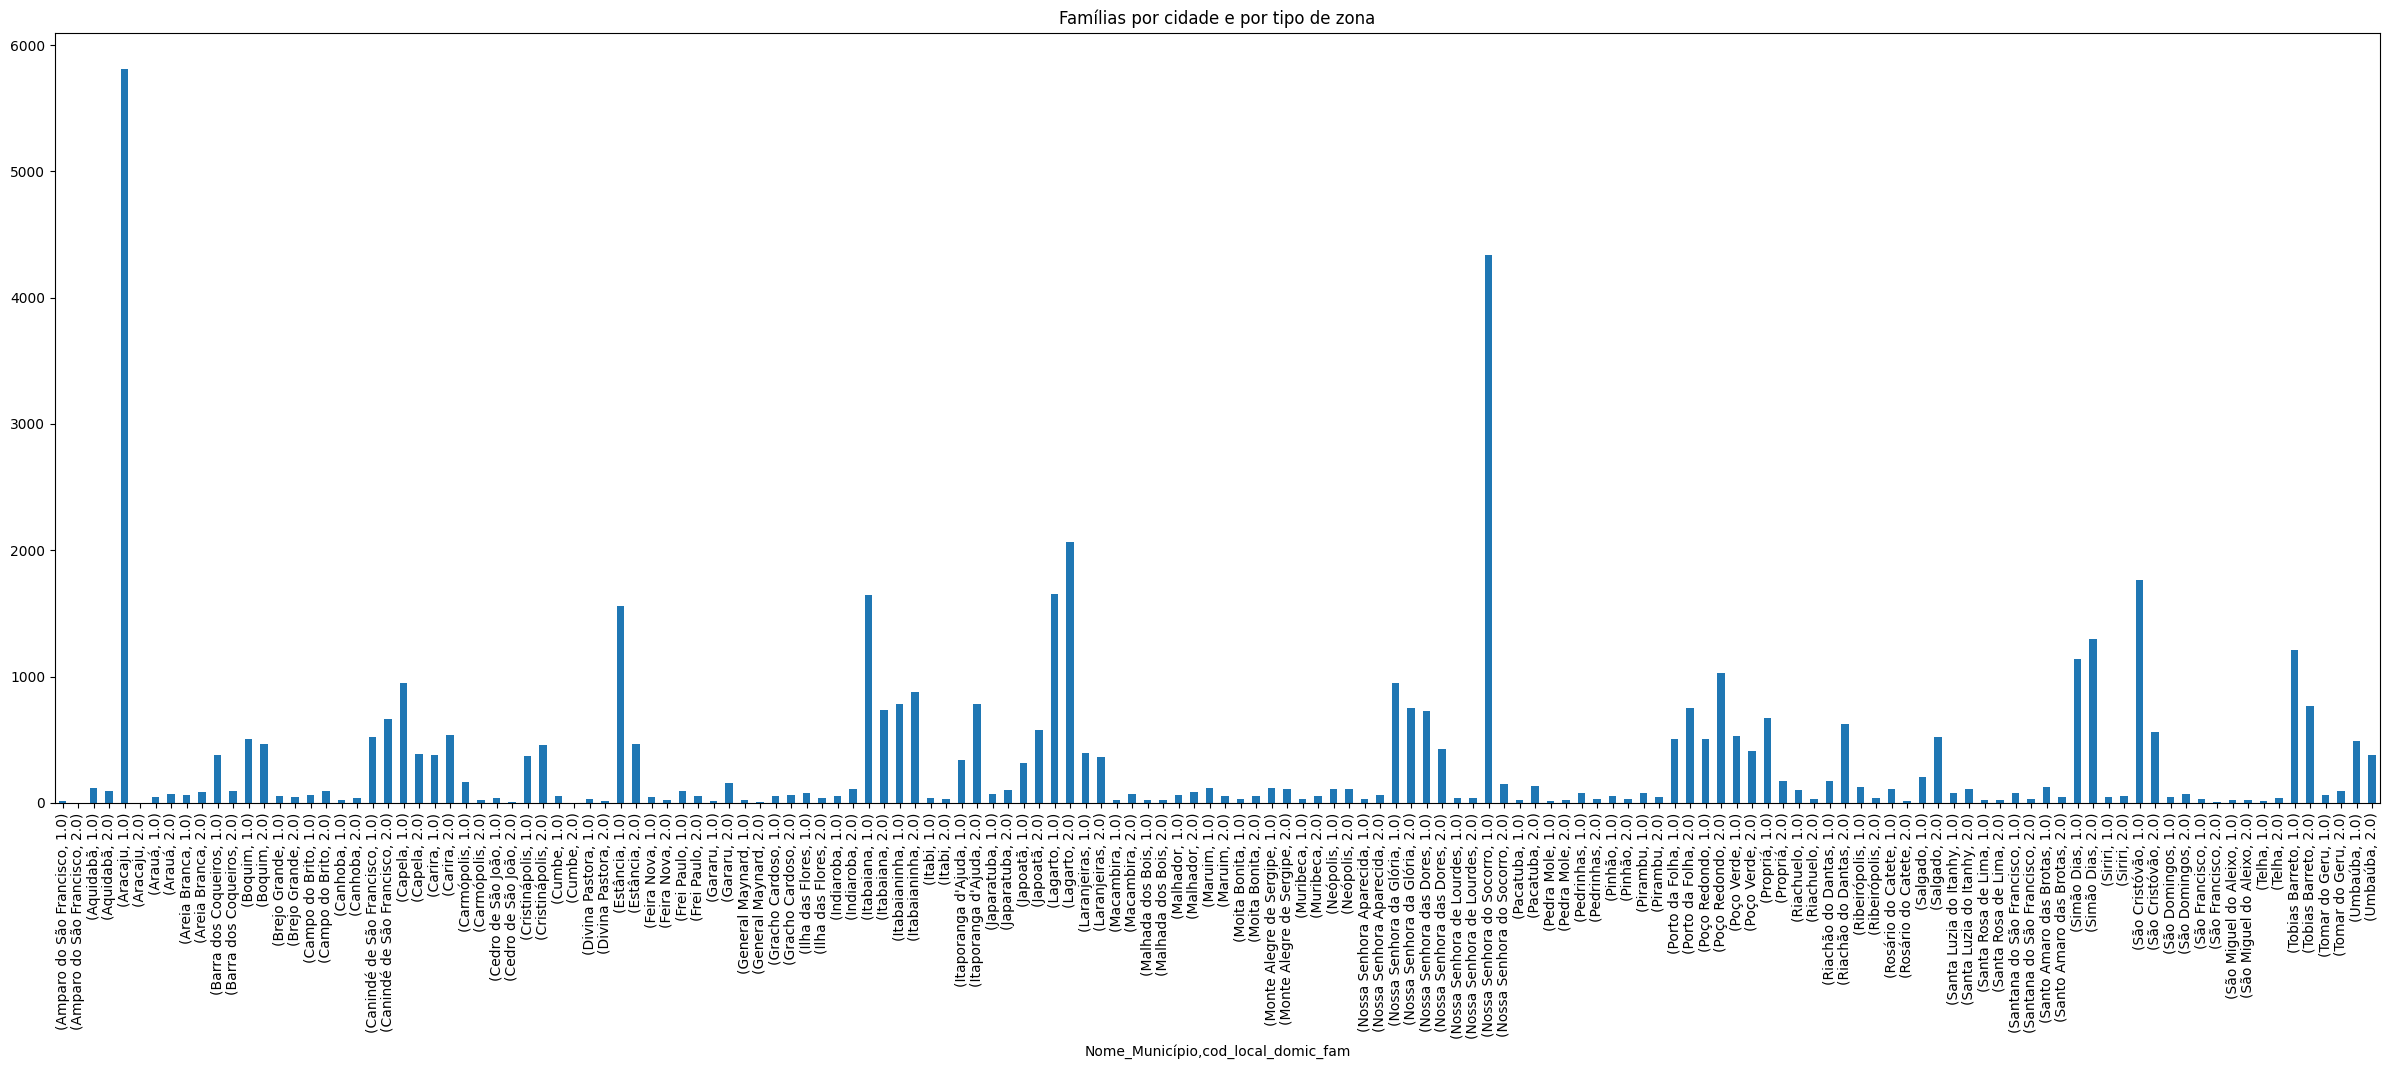

In [25]:
df2.plot(kind="bar",figsize=(30,10), title=("Famílias por cidade e por tipo de zona"))

In [26]:
#perecebemos que a maior população que recebe bolsa familia em um unico municipio é de quase 100% urbana,se deduz que essa população pertence a captal, Aracaju

In [27]:
#agora vamos ver de maneira geral em todo estado qual população recebe mais bolsa familia, sem separar por cidade.

In [28]:
df2 = df1.groupby(['cod_local_domic_fam']).size()

In [29]:
df2

cod_local_domic_fam
1.0    31618
2.0    18868
dtype: int64

<AxesSubplot: title={'center': 'Familias por tipo de zona'}, xlabel='cod_local_domic_fam'>

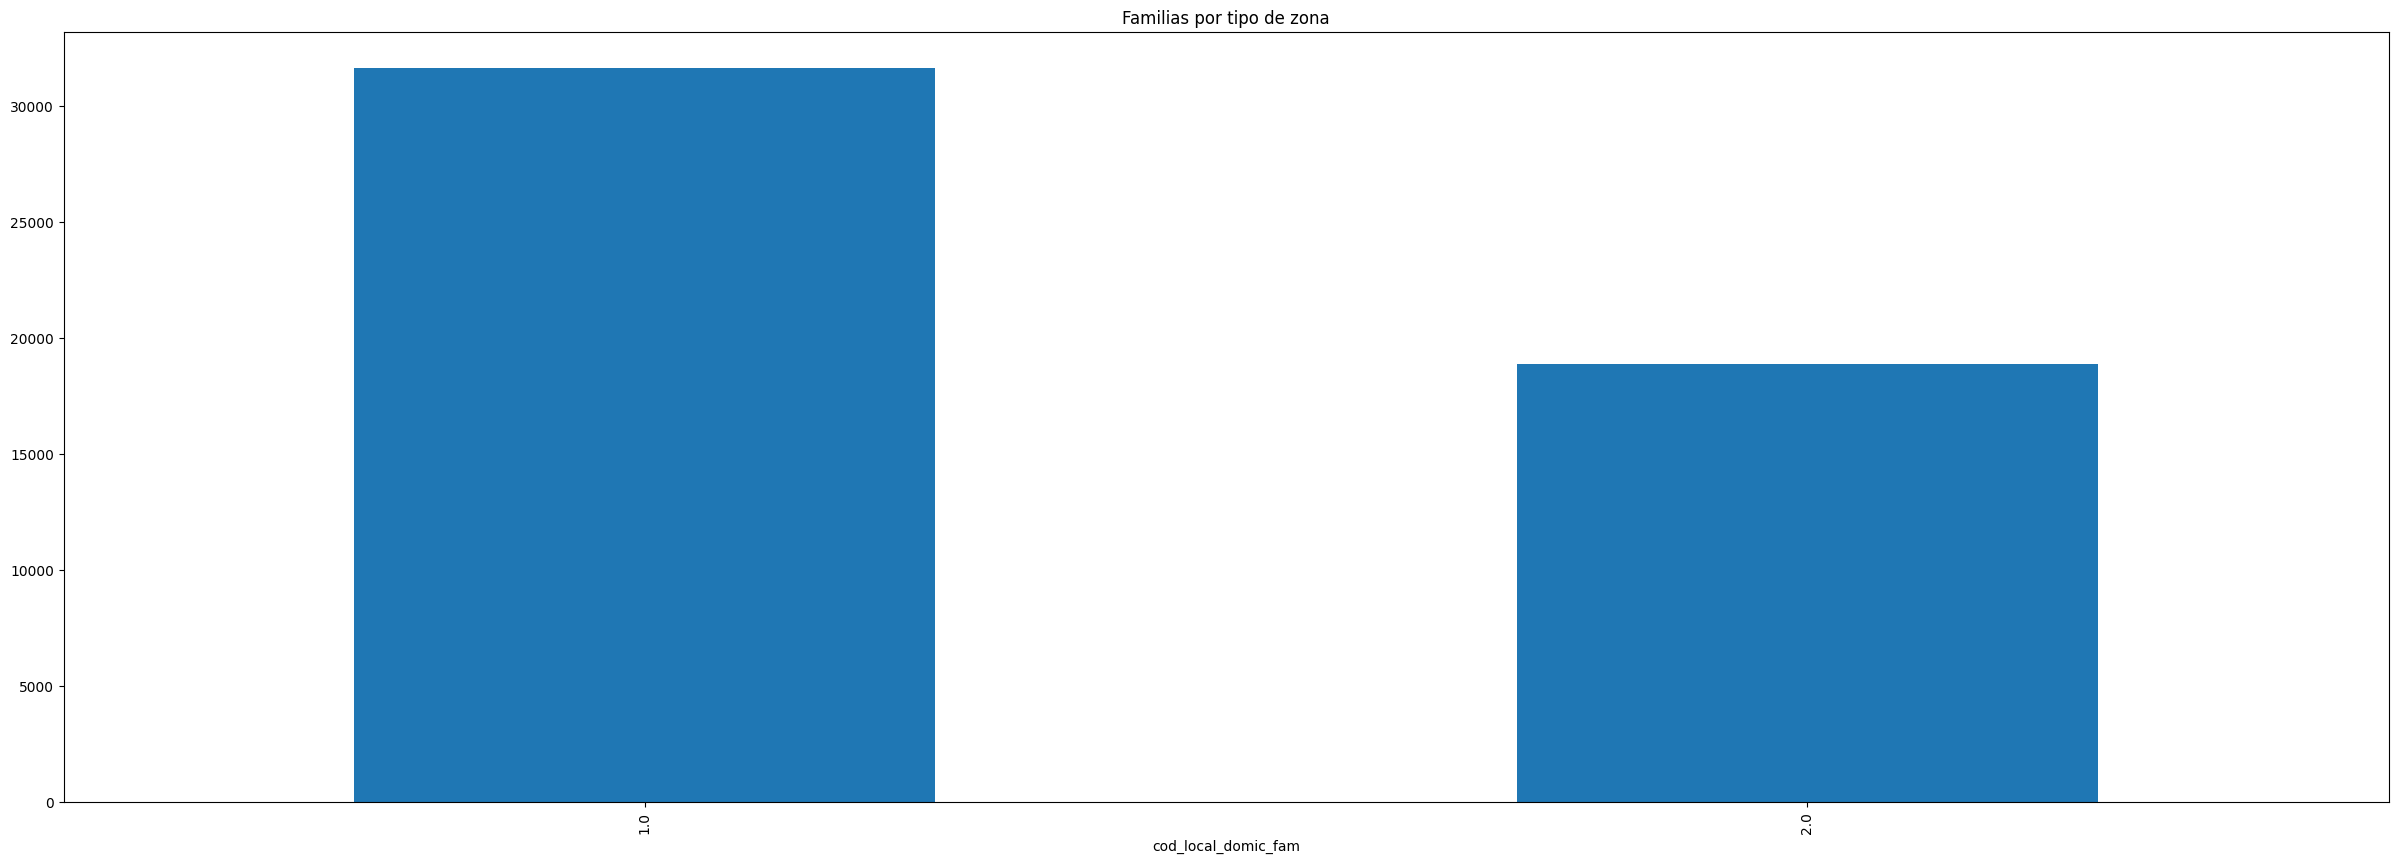

In [30]:
df2.plot(kind="bar",figsize=(30,10),title=("Familias por tipo de zona"))

In [31]:
#portanto podemos ver que a maioria das familias que recebem bolsa familia vive em areas urbanas.

In [32]:
#vamos mais uma vez verificar as cidades, dessa vez queremos verificar familias por grupos etnicos

In [33]:
df2 = df1.groupby(['Nome_Município','ind_parc_mds_fam']).size()

In [34]:
df2

Nome_Município           ind_parc_mds_fam
Amparo do São Francisco  0.0                   10
                         202.0                  9
Aquidabã                 0.0                  154
                         205.0                 54
Aracaju                  0.0                 5558
                                             ... 
Tomar do Geru            301.0                  1
Umbaúba                  0.0                  862
                         101.0                  4
                         202.0                  1
                         205.0                  3
Length: 251, dtype: int64

<AxesSubplot: title={'center': 'Familias por grupo especifico por cidade'}, xlabel='Nome_Município,ind_parc_mds_fam'>

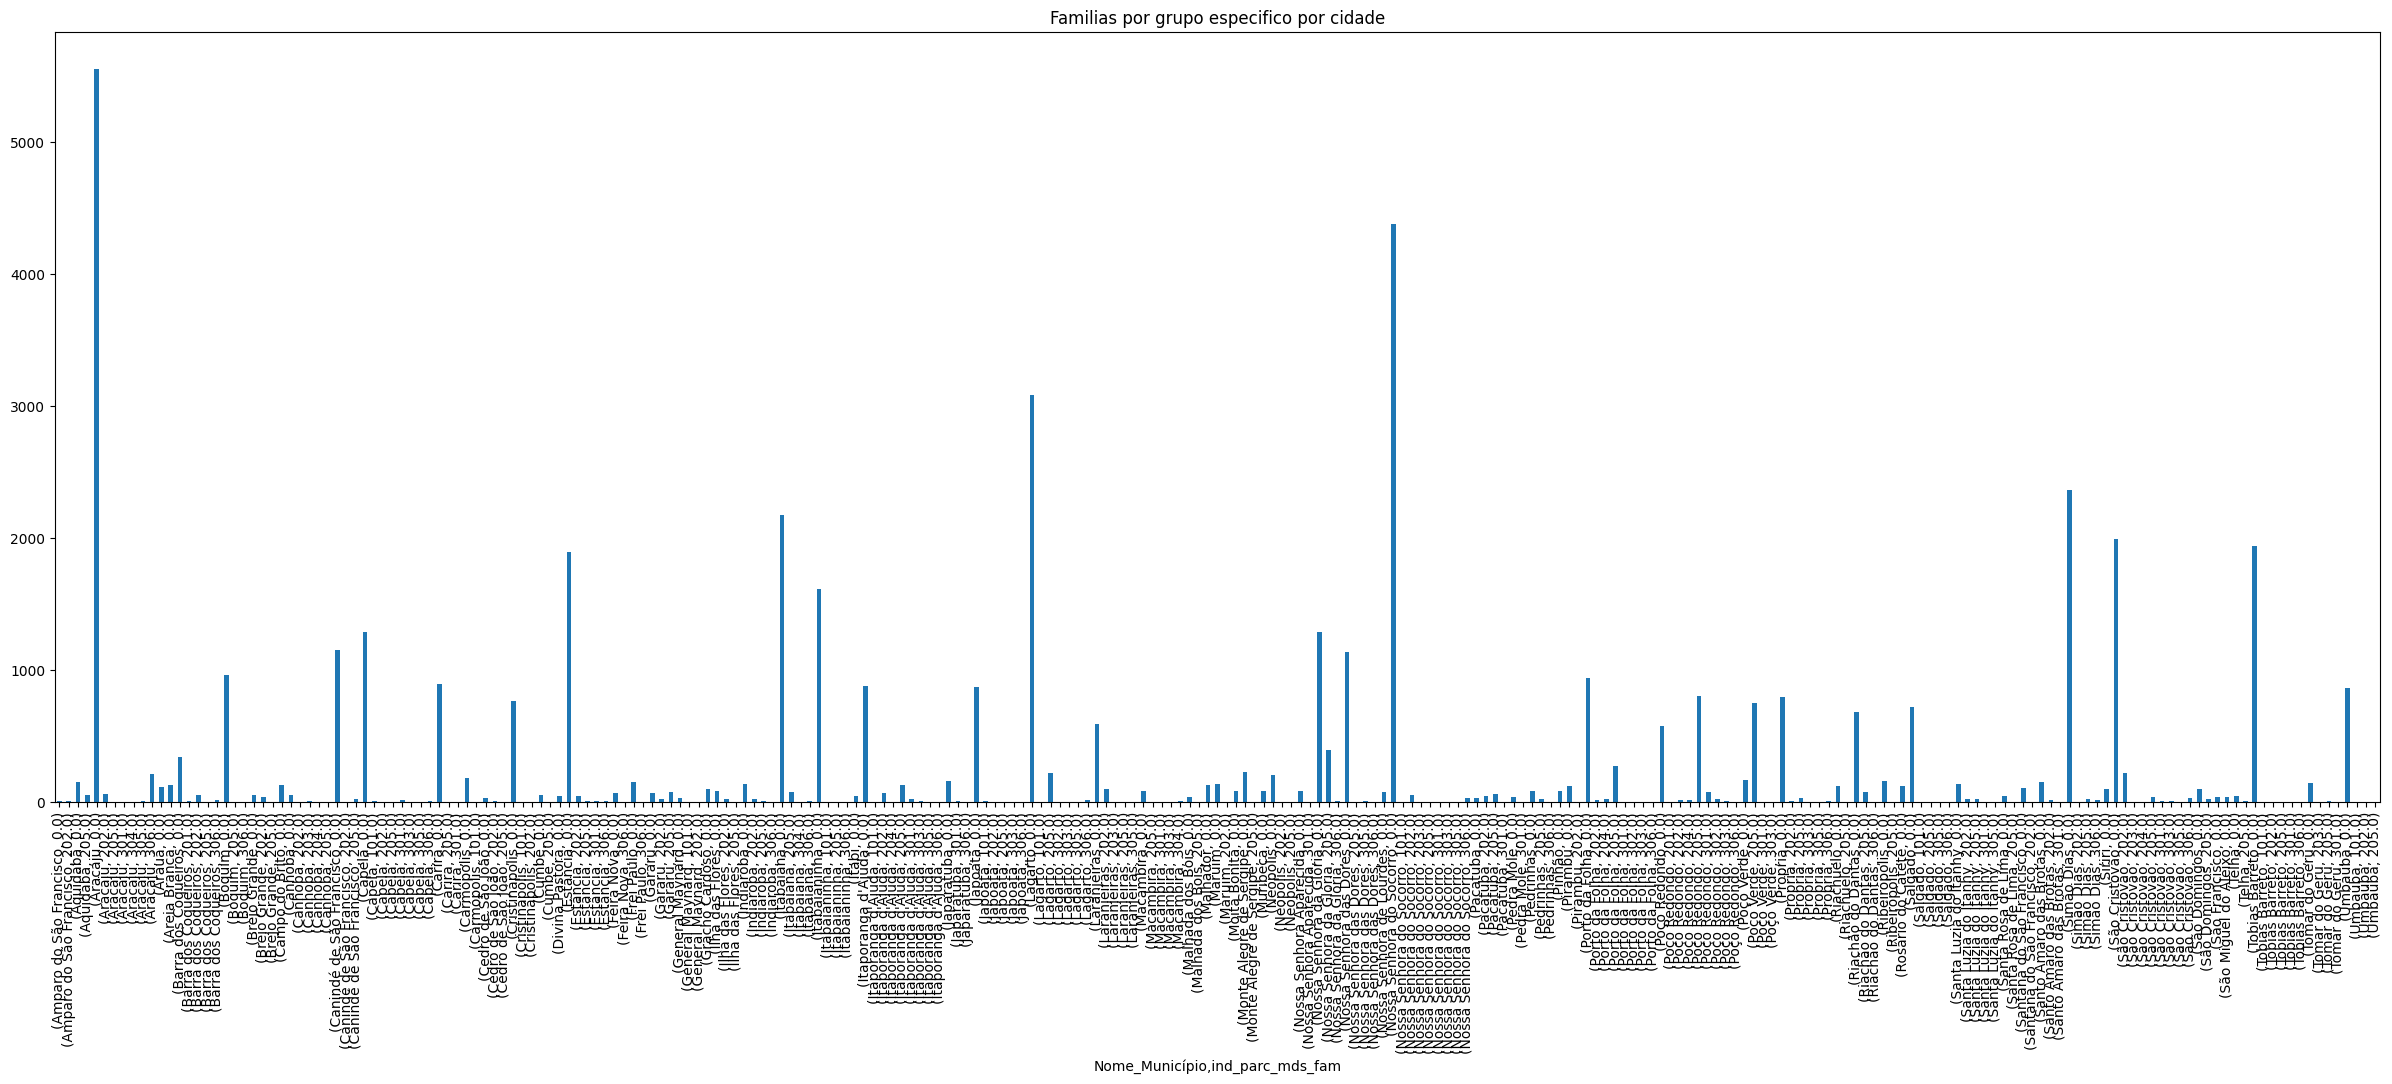

In [35]:
df2.plot(kind="bar",figsize=(30,10),title=("Familias por grupo especifico por cidade"))

In [36]:
#vemos que na cidade de Aracaju por exemplo, a maioria das familias não vem de nenhum dos grupos especificos contabilizados na pesquisa 

In [37]:
#agora vamos ver a distribuição em todo o estado
df2 = df1.groupby(['ind_parc_mds_fam']).size()

In [38]:
df2

ind_parc_mds_fam
0.0      44616
101.0       34
201.0        7
202.0      863
203.0        9
204.0       49
205.0     3189
301.0      157
302.0       24
303.0       28
304.0        9
305.0       26
306.0      404
dtype: int64

<AxesSubplot: title={'center': 'familias por grupo especifico'}, xlabel='ind_parc_mds_fam'>

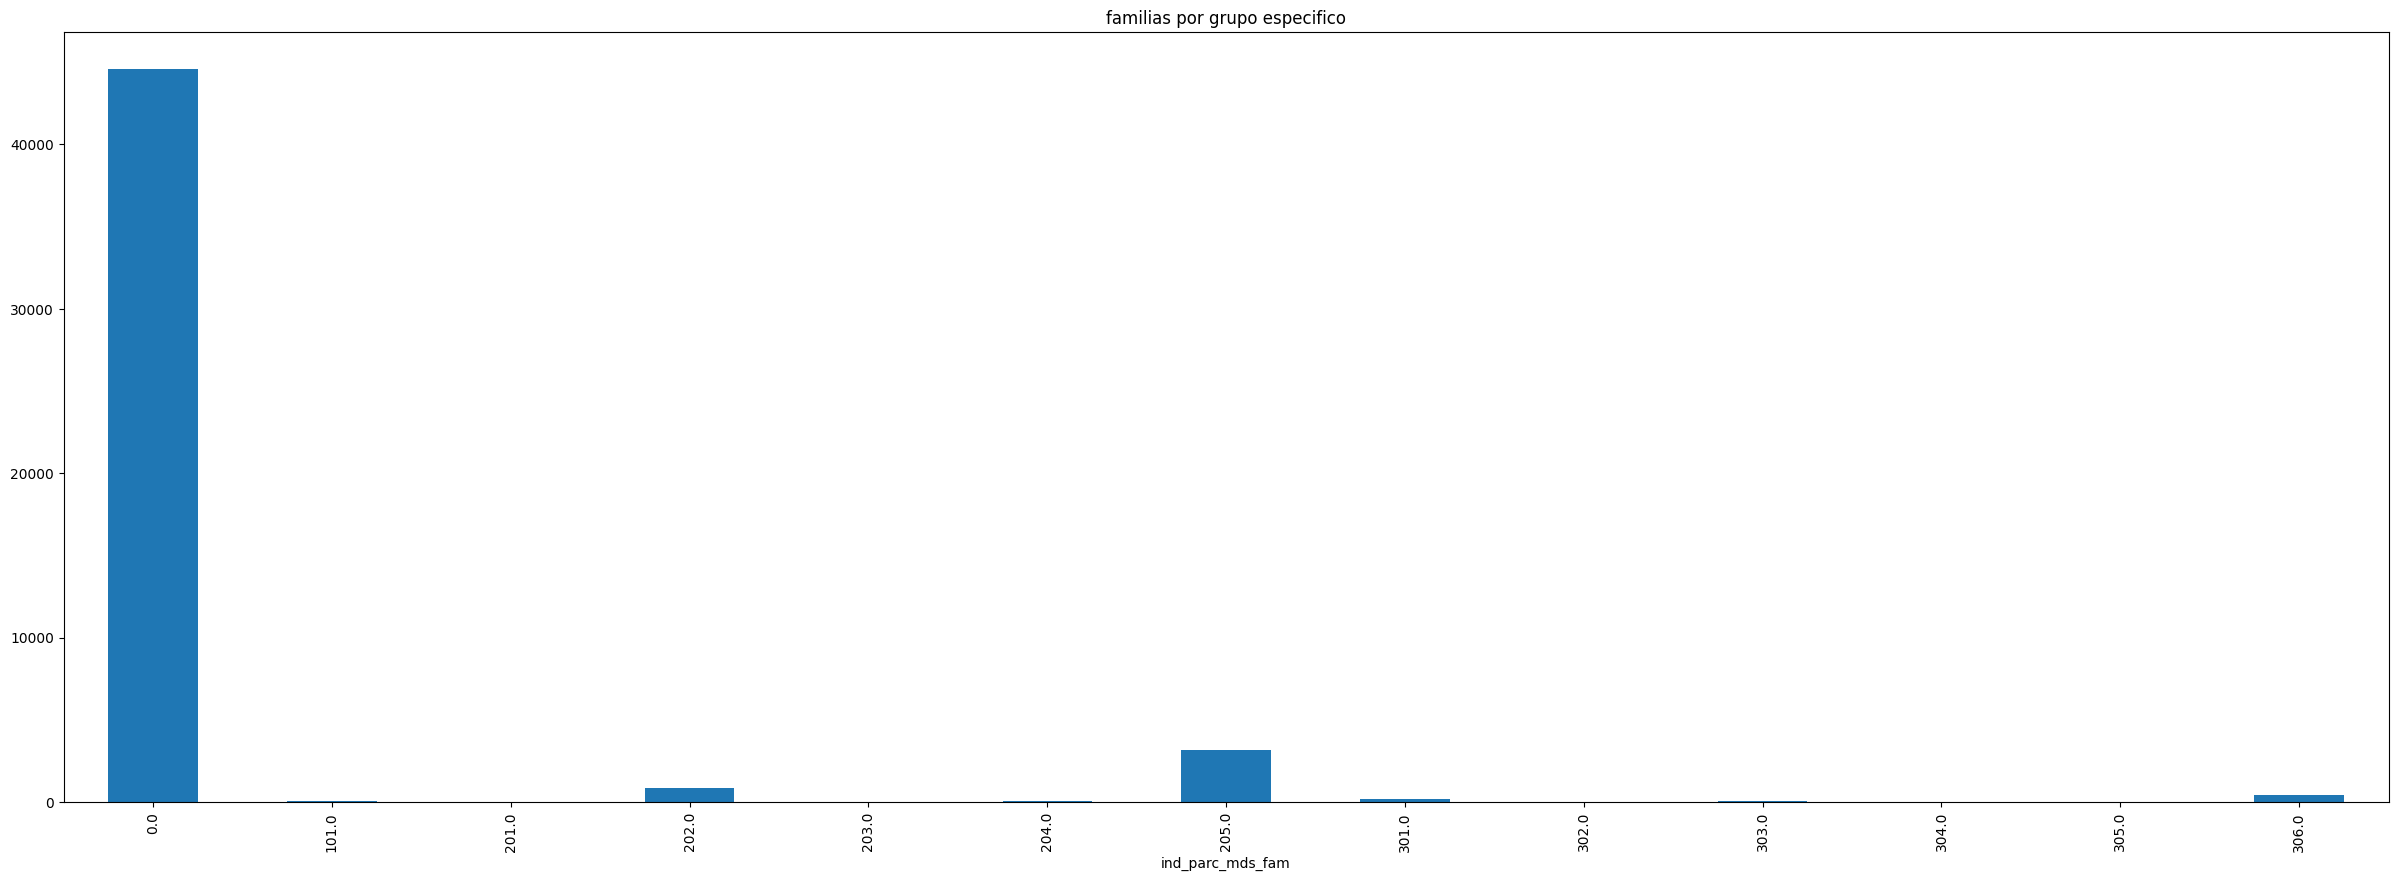

In [39]:
df2.plot(kind="bar",figsize=(30,10),title=("familias por grupo especifico"))

In [40]:
# vemos que a maioria dos membros do bolsa familia são consideradas de nenhum grupo especifico, com o maior entre os indentificados sendo
#o grupo agricutores familiares (3189 familias), seguido pelos pescadores(863 familias) e seguido por catadores de material reciclagem e por fim entre 
# os grupos  com um numero siguinficativo de pessoas pelos catadores de material reciclavel